In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Sunspots.csv")

In [3]:
df.shape

(3265, 3)

In [4]:
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [5]:
df['Date'][0]

'1749-01-31'

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date'][0]

Timestamp('1749-01-31 00:00:00')

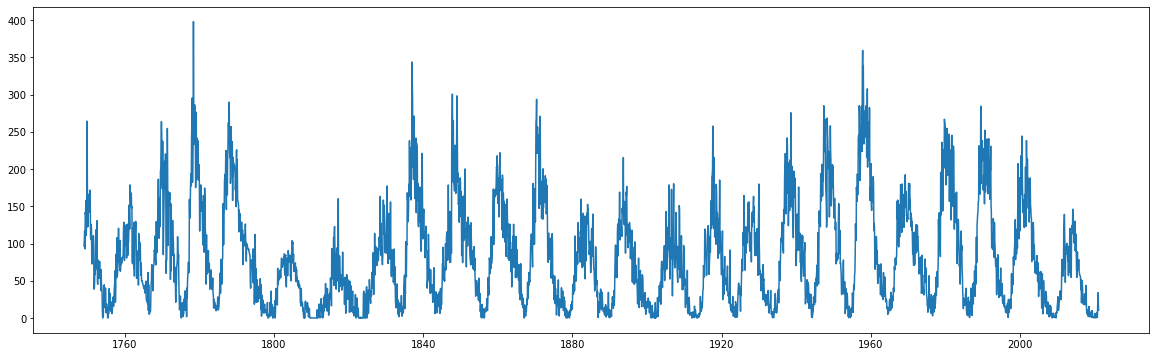

In [11]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Monthly Mean Total Sunspot Number'])
plt.show()

In [12]:
model = Sequential()
model.add(SimpleRNN(5, input_shape=(3,1), activation='linear'))
model.add(Dense(2, activation="tanh"))
model.add(Dense(1, activation="linear"))

In [13]:
model.compile(optimizer='adam', loss="mean_squared_error")

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 2)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
